In [1]:
import os
os.environ['DATAPATH'] = os.path.join(os.getcwd(), 'data')
os.environ['LOG_DIR'] = os.path.join(os.getcwd(), 'logs')

! python train_graph_iteration.py \
    --task lp \
    --act None \
    --dataset binary_cyclic_tree_multiple\
    --model HyboNet \
    --lr 0.025 \
    --dim 3 \
    --num-layers 2 \
    --bias 1 \
    --dropout 0.25 \
    --weight-decay 1e-3 \
    --manifold Lorentz \
    --log-freq 5 \
    --cuda -1 \
    --patience 500 \
    --grad-clip 0.1 \
    --seed 1234 \
    --save 1


INFO:root:Using: cpu
INFO:root:Using seed 1234.
INFO:root:Use Super Node : False
INFO:root:Use Batch Learning : True
INFO:root:Use Margin Loss : True
INFO:root:Use CT + Myelination : False
INFO:root:Step Size for Reduction Factor (Gamma) for learning rate : None
INFO:root:Reduction Factor (Gamma) for learning rate : 0.5
C:\Users\rarh9\Desktop\MIT\6.8610\educational_concept_librarian\fhnn\utils\data_utils.py:115: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:619.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (manifold): Lorentz manifold
  (encoder): HyboNet(
    (manifold): Lorentz manifold
    (layers): Sequential(
      (0): LorentzGraphConvolution(
        (linear): LorentzLinear(
          (manifold): Lorentz manifold
          (weight): Linear(in_features=1024, out_feat

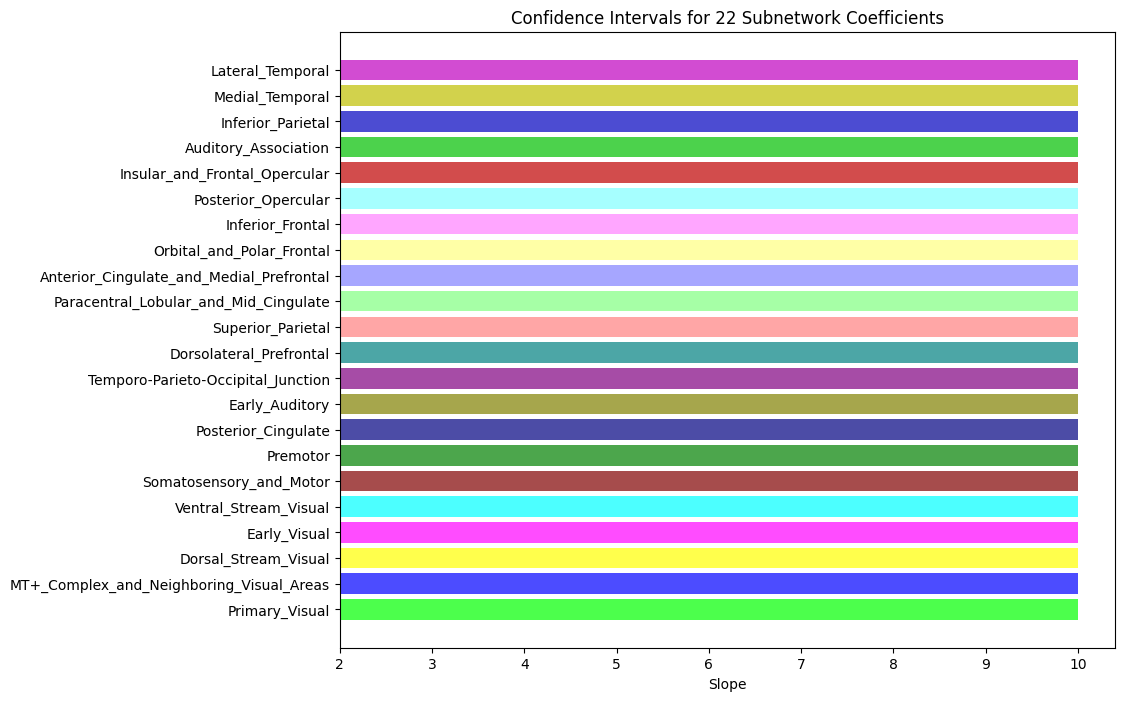

In [20]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8))
COLORS = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', 
            '#00ffff', '#800000', '#008000', '#000080', '#808000', 
            '#800080', '#008080', '#ff8080', '#80ff80', '#8080ff', 
            '#ffff80', '#ff80ff', '#80ffff', '#c00000', '#00c000', 
            '#0000c0', '#c0c000', '#c000c0']
CORTEX_TO_ABBREVIATION = {
    'Primary_Visual': 'PV',
    'MT+_Complex_and_Neighboring_Visual_Areas': 'MT+CNVS',
    'Dorsal_Stream_Visual': 'DSV',
    'Early_Visual': 'EV',
    'Ventral_Stream_Visual': 'VSV',
    'Somatosensory_and_Motor': 'SM',
    'Premotor': 'Pre',
    'Posterior_Cingulate': 'PC',
    'Early_Auditory': 'EA',
    'Temporo-Parieto-Occipital_Junction': 'TPOJ',
    'Dorsolateral_Prefrontal': 'DP',
    'Superior_Parietal': 'SP',
    'Paracentral_Lobular_and_Mid_Cingulate': 'PLMC',
    'Anterior_Cingulate_and_Medial_Prefrontal': 'ACMP',
    'Orbital_and_Polar_Frontal': 'OPF',
    'Inferior_Frontal': 'IF',
    'Posterior_Opercular': 'PO',
    'Insular_and_Frontal_Opercular': 'IFO',
    'Auditory_Association': 'AA',
    'Inferior_Parietal': 'IP',
    'Medial_Temporal': 'MT',
    'Lateral_Temporal': 'LT'
}
# Stacked bar plot for each statistic
confidence_intervals = [[2 , 10] for x in range(22)]
for i in range(len(confidence_intervals)):
    ax.barh(i, confidence_intervals[i][1] - confidence_intervals[i][0], left=confidence_intervals[i][0], height=0.8, color=COLORS[i + 1], alpha=0.7)    
    # ax.plot([confidence_intervals[i][0], confidence_intervals[i][1]], [i, i], color='black', linewidth=2)  # Whiskers

# Customize the plot
ax.set_yticks(np.arange(len(confidence_intervals)))
subnetwork_names = [*CORTEX_TO_ABBREVIATION.keys()]
ax.set_yticklabels([subnetwork_names[i] for i in range(len(confidence_intervals))])
ax.set_xlabel('Slope')
ax.set_title('Confidence Intervals for 22 Subnetwork Coefficients')

plt.show()
# # Customize the plot
# ax.set_yticks(np.arange(len(confidence_intervals)))
# ax.set_yticklabels(['Statistic {}'.format(i+1) for i in range(len(confidence_intervals))])
# ax.set_xlabel('Slope')
# ax.set_title('Confidence Intervals for 22 Statistics')

# plt.show()

In [21]:

# Assume data is a 3D array with dimensions: (subjects, datapoints, decades)
# Each slice along the second axis represents the datapoints for one subject.
# Each slice along the third axis represents the decades.
# For simplicity, let's assume you have a function to calculate slopes for each statistic.
def calculate_slopes(data):
    slopes = []
    for statistic in data:
        model = LinearRegression()
        print(statistic)
        model.fit(np.arange(7).reshape(1, 7), statistic)
        slopes.append(model.coef_[0])
    return slopes

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Bootstrap loop
bootstrap_slopes = []
for _ in range(num_bootstrap_samples):
    # Create a bootstrap sample
    bootstrap_sample = data[np.random.choice(data.shape[0], size=data.shape[0], replace=True)]

    # Calculate slopes for the bootstrap sample
    bootstrap_slopes.append(calculate_slopes(bootstrap_sample))

# Calculate confidence intervals for each statistic
confidence_intervals = np.percentile(bootstrap_slopes, [2.5, 97.5], axis=0)


NameError: name 'data' is not defined